In [36]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import cross_val_score

In [32]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

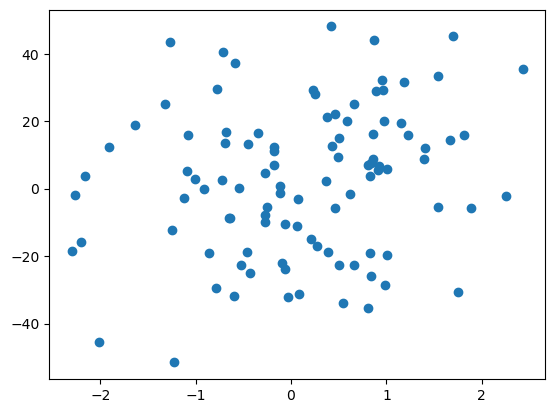

In [3]:
plt.scatter(X,y)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr =LinearRegression()

In [55]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783816


In [56]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

In [50]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [51]:
gd = GDRegressor(0.001,50)

In [52]:
gd.fit(X_train,y_train)

27.837060471820052 -2.2991839308293196


In [53]:
gd.predict(X)

array([[-22.13004587],
       [-14.46803398],
       [-14.93031641],
       [ 24.22481941],
       [  4.3220791 ],
       [ 21.67440917],
       [ -9.07267152],
       [  2.84916767],
       [-22.36969544],
       [-14.266255  ],
       [ 53.79864004],
       [  8.75884689],
       [  3.48535872],
       [ -8.76923699],
       [-23.69550079],
       [ 10.31541979],
       [ 15.51330493],
       [  7.70913832],
       [-47.25904197],
       [ 46.39456556],
       [-24.26231913],
       [-16.55078722],
       [-28.14130775],
       [ 57.56115677],
       [ -8.07119002],
       [-47.92672634],
       [-11.72532075],
       [-11.26615965],
       [-15.69914914],
       [-16.86253782],
       [ 17.79820103],
       [ 19.02152826],
       [ 10.32439521],
       [-37.41858492],
       [-63.18204405],
       [-35.29775901],
       [  3.75403106],
       [ 34.73292872],
       [-32.56312362],
       [ 13.35252918],
       [-44.41234489],
       [ -2.36568738],
       [-10.04163129],
       [ 10

In [57]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6357499569549734